<a href="https://colab.research.google.com/github/Kabzel55/Regression/blob/master/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Wczytywanie danych Housing do obiektu Data Frame

1. **CRIM**: współczynnik przestępczości per capita na każde miasteczko
2. **ZN**: odsetek działek przekraczających 25 000 stóp kwadratowych (≈ 2533 metrów kwadratowych).
3. **INDUS**: odsetek terenów przeznaczonych na przemysł niedetaliczny na każde miasteczko
4. **CHAS**: zmienna zerojedynkowa określająca rzekę Charles (przyjmuje wartość 1, gdy na danym terenie znajduje się koryto rzeki)
5. **NOX**: stężenie tlenków azotu (w częściach na 10 milionów)
6. **RM**: średnia liczba pomieszczeń na dom
7. **AGE**: odsetek zamieszkałych budynków wybudowanych przed 1940 rokiem
8. **DIS**: ważona odległość do pięciu bostońskich urzędów pracy
9. **RAD**: wskaźnik dostępności do głównych arterii komunikacyjnych
10. **TAX**: pełna wartość podatku od nieruchomości na każde 10 000 dolarów
11. **PTRATIO**: stosunek liczby uczniów do nauczycieli na każde miasteczko
12. **B**: parametr wyliczany ze wzoru 1000(Bk - 0.63)^2, gdzie Bk oznacza odsetek osób pochodzenia afroamerykańskiego 
zamieszkujących dane miasteczko 
13. **LSTAT**: odsetek ubogiej części społeczeństwa
14. **MEDV**:  mediana wartości zamieszkanych domów wyrażona w tysiącach dolarów

In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/rasbt/python-machine-learning-book-2nd-edition/master/code/ch10/housing.data.txt', header=None, sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
              'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Eksploracyjna analiza danych (ang. exploratory data analysis - **EDA**)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


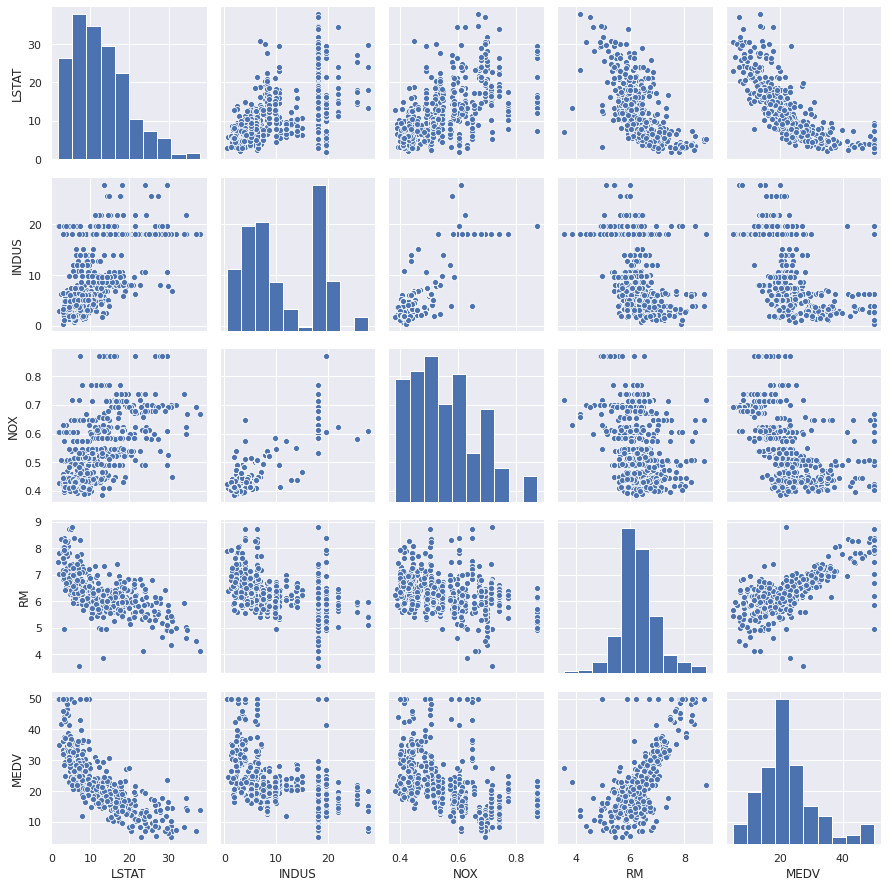

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
sns.pairplot(df[cols], height=2.5)
plt.tight_layout()
plt.show()

Analiza związków za pomocą macierzy korelacji

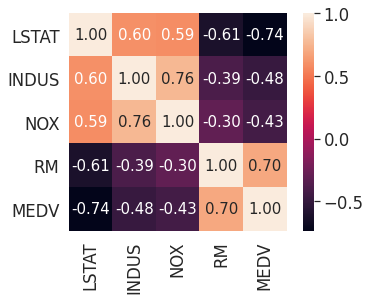

In [3]:
import numpy as np
cm= np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,cbar=True,annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols, xticklabels=cols)

Implementacja modelu regresji liniowej wykorzystującego zwykłą metodę najmniejszych kwadratów

Określanie parametrów regresywnych za pomocą metody gradientu prostego

In [4]:
class LinearRegressionGD(object):

    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def predict(self, X):
        return self.net_input(X)

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

In [ ]:
X = df[['RM']].values
y = df[['MEDV']].values
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_y = StandardScaler()

x_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[: np.newaxis]).flatten()
lr = LinearRegressionGD()
lr.fit(x_std, y_std)

Wykres kosztu w funkcji epok dla modelu regresji liniowej:

Text(0, 0.5, 'Suma kwadratow bledu')

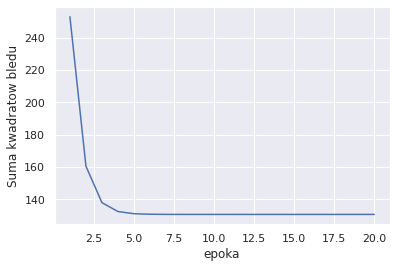

In [26]:
sns.set()
plt.plot(range (1,lr.n_iter+1), lr.cost_)
plt.xlabel('epoka')
plt.ylabel('Suma kwadratow bledu')

In [7]:
def lin_regplot(X,y,model):
    plt.scatter(X, y, c='steelblue', edgecolors='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)
    return None

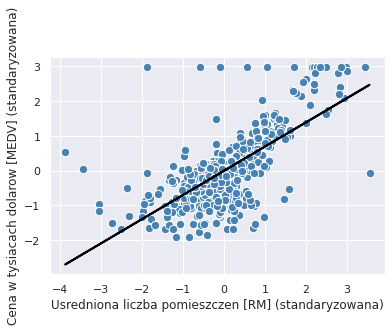

In [8]:
lin_regplot(x_std,y_std, lr)
plt.xlabel('Usredniona liczba pomieszczen [RM] (standaryzowana)')
plt.ylabel('Cena w tysiacach dolarow [MEDV] (standaryzowana)')
plt.show()

prognozowanie cen mieszkań 5 pokojowych:

In [9]:
num_rows_std = sc_x.transform(np.array([[5.0]]))
price_std = lr.predict(num_rows_std)
print('Cena w tysiacach dolarow: %.3f '% sc_y.inverse_transform(price_std))

Cena w tysiacach dolarow: 10.840 


Szacowanie współczynnika modelu regresji za pomocą biblioteki scikit-learn

In [10]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

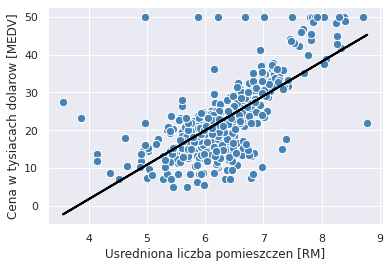

In [11]:
lin_regplot(X,y,slr)
plt.xlabel('Usredniona liczba pomieszczen [RM]')
plt.ylabel('Cena w tysiacach dolarow [MEDV]')
plt.show()

Uczenie odpornego modelu regresywnego za pomocą algorytmu **RANSAC**

In [12]:
from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor(LinearRegression(), max_trials=100, min_samples=50, loss='absolute_loss', residual_threshold=5.0, random_state=0)
ransac.fit(X,y)

RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                                n_jobs=None, normalize=False),
                is_data_valid=None, is_model_valid=None, loss='absolute_loss',
                max_skips=inf, max_trials=100, min_samples=50, random_state=0,
                residual_threshold=5.0, stop_n_inliers=inf,
                stop_probability=0.99, stop_score=inf)

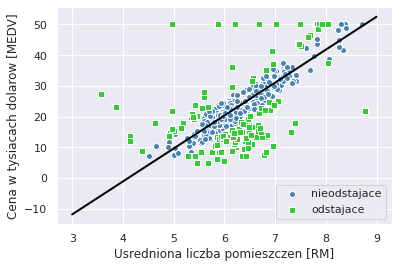

In [13]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_x = np.arange(3,10,1)
line_y_ransac = ransac.predict(line_x[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask], c='steelblue', edgecolors='white', marker='o', label='nieodstajace')
plt.scatter(X[outlier_mask], y[outlier_mask], c='limegreen', edgecolors='white', marker='s', label='odstajace')
plt.plot(line_x,line_y_ransac,color='black', lw=2)
plt.xlabel('Usredniona liczba pomieszczen [RM]')
plt.ylabel('Cena w tysiacach dolarow [MEDV]')
plt.legend(loc='best')
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, :-1].values
y = df['MEDV'].values
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

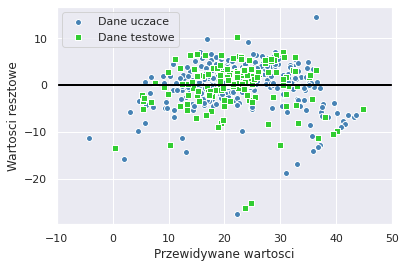

In [15]:
plt.scatter(y_train_pred,y_train_pred - y_train, c='steelblue', marker='o', edgecolors='white', label='Dane uczace')
plt.scatter(y_test_pred, y_test_pred - y_test, c='limegreen', marker='s', edgecolors='white', label='Dane testowe')

plt.xlabel('Przewidywane wartosci')
plt.ylabel('Wartosci resztowe')
plt.legend(loc='best')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='black')
plt.xlim([-10,50])
plt.show()

In [16]:
from sklearn.metrics import mean_squared_error
print('Mse na probkach uczacych: %.3f, testowych: %.3f' %(
    mean_squared_error(y_train, y_train_pred),
    mean_squared_error(y_test, y_test_pred))
)

Mse na probkach uczacych: 19.958, testowych: 27.196


In [17]:
from sklearn.metrics import r2_score
print('Wspolczynnik R^2 dla danych uczacych %.3f, testowych: %.3f' %(
    r2_score(y_train, y_train_pred),
    r2_score(y_test, y_test_pred)
))

Wspolczynnik R^2 dla danych uczacych 0.765, testowych: 0.673


Przekształcanie modelu regresji liniowej w krzywą — regresja wielomianowa

In [18]:
from sklearn.preprocessing import PolynomialFeatures
X = df[['LSTAT']].values
y = df['MEDV'].values
regr = LinearRegression()

quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]

regr=regr.fit(X=X,y=y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))

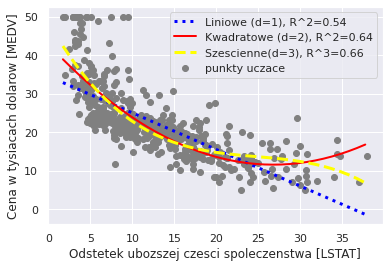

In [19]:
plt.scatter(X, y, label='punkty uczace', color='gray')

plt.plot(X_fit, y_lin_fit, label='Liniowe (d=1), R^2=%.2f' % linear_r2,
         color='blue', lw=3, linestyle=':')
plt.plot(X_fit, y_quad_fit, label='Kwadratowe (d=2), R^2=%.2f' % quadratic_r2,
         color='red', lw=2, linestyle='-')

plt.plot(X_fit, y_cubic_fit, label='Szescienne(d=3), R^3=%.2f' % cubic_r2,
         color='yellow', lw=3, linestyle='--')

plt.xlabel('Odstetek ubozszej czesci spoleczenstwa [LSTAT]')
plt.ylabel('Cena w tysiacach dolarow [MEDV]')
plt.legend(loc='best')
plt.show()


Przekształcenie zmiennych objaścniających do postaci logarytmicznej oraz spierwiastkowanie zmiennych odpowiedzi

In [20]:
X_log = np.log(X)
y_sqrt = np.sqrt(y)

X_fit = np.arange(X_log.min()-1, X_log.max()+1, 1) [:, np.newaxis]
regr = regr.fit(X_log, y_sqrt)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y_sqrt, regr.predict(X_log))

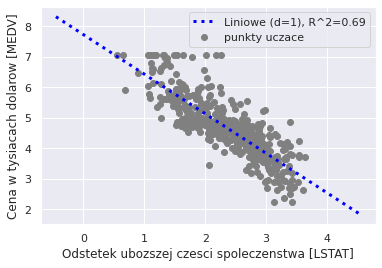

In [21]:
plt.scatter(X_log, y_sqrt, label='punkty uczace', color='gray')
plt.plot(X_fit, y_lin_fit, label='Liniowe (d=1), R^2=%.2f' % linear_r2,
         color='blue', lw=3, linestyle=':')
plt.xlabel('Odstetek ubozszej czesci spoleczenstwa [LSTAT]')
plt.ylabel('Cena w tysiacach dolarow [MEDV]')
plt.legend(loc='best')
plt.show()

Regresja przy użyciu algorytmy drzewa decyzjnego

In [24]:
from sklearn.tree import DecisionTreeRegressor
X = df[['LSTAT']].values
y = df['MEDV'].values
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X,y)
sort_idx = X.flatten().argsort()

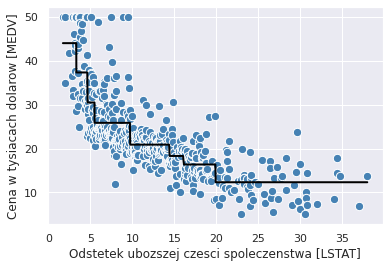

In [25]:
lin_regplot(X[sort_idx],y[sort_idx],tree)
plt.xlabel('Odstetek ubozszej czesci spoleczenstwa [LSTAT]')
plt.ylabel('Cena w tysiacach dolarow [MEDV]')
plt.show()